In [16]:
import keras
from keras import models
from keras import layers
from keras import optimizers

In [17]:
from keras.applications import VGG16

In [ ]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [4]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

# Method 1: Fast Feature extraction without Data Augmentation

Use conv_base to compute embedding. Use this embedding as input in another classifier.
Advantage is that this is fast but you cannot use data augmentation.

In [5]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(rescale=1./255)
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
    )
    i = 0
    last = False
    for input_batch, labels_batch in generator:
        predictions = conv_base.predict(input_batch)
        features[i:i + len(input_batch)] = predictions
        labels[i:i + len(input_batch)] = labels_batch
        i += len(input_batch)
        if i >= sample_count-1:
            break
    return (features, labels)

train_data, train_labels = extract_features('datasets/catdog/train', 2000)
validation_data, validation_labels = extract_features('datasets/catdog/validation', 1000)

Found 1999 images belonging to 2 classes.


c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(

Found 1000 images belonging to 2 classes.


c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, le

In [42]:
train_data.shape

(2000, 4, 4, 512)

In [43]:
validation_data.shape

(1000, 4, 4, 512)

In [44]:
train_data = train_data.reshape(2000, 4 * 4 * 512)

In [45]:
validation_data = validation_data.reshape(1000, 4 * 4 * 512)

In [46]:

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_data, train_labels, batch_size=20, epochs=30, validation_data=(validation_data, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 512us/step - loss: 0.6086 - acc: 0.6570 - val_loss: 0.4440 - val_acc: 0.8330
Epoch 2/30
2000/2000 [==============================] - 1s 275us/step - loss: 0.4345 - acc: 0.7965 - val_loss: 0.3692 - val_acc: 0.8450
Epoch 3/30
2000/2000 [==============================] - 1s 275us/step - loss: 0.3541 - acc: 0.8500 - val_loss: 0.3177 - val_acc: 0.8770
Epoch 4/30
2000/2000 [==============================] - 1s 288us/step - loss: 0.3129 - acc: 0.8685 - val_loss: 0.2943 - val_acc: 0.8870
Epoch 5/30
2000/2000 [==============================] - 1s 277us/step - loss: 0.2848 - acc: 0.8885 - val_loss: 0.2812 - val_acc: 0.8850
Epoch 6/30
2000/2000 [==============================] - 1s 286us/step - loss: 0.2670 - acc: 0.9030 - val_loss: 0.2702 - val_acc: 0.8900
Epoch 7/30
2000/2000 [==============================] - 1s 275us/step - loss: 0.2471 - acc: 0.9000 - val_loss: 0.2615 - val_acc: 0.8940


In [53]:
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
steps = list(range(len(train_acc)))

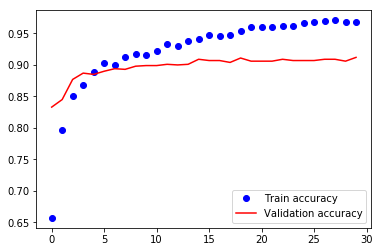

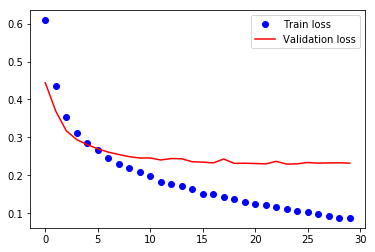

In [58]:
import matplotlib.pyplot as plt
plt.plot(steps, train_acc, 'bo', label='Train accuracy')
plt.plot(steps, val_acc, 'r-', label='Validation accuracy')
plt.legend()
plt.show()

plt.plot(steps, train_loss, 'bo', label='Train loss')
plt.plot(steps, val_loss, 'r-', label='Validation loss')
plt.legend()
plt.show()

# Method 2: Adding additional custom layers to existing model

In [7]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

The first step is to freeze the convolutional base, to make sure we don't train it again. This is done as follows:

In [8]:
conv_base.trainable = False

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


As can be seen in the summary above, all params of conv_base is set to non-trainable

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'datasets/catdog/train',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    'datasets/catdog/validation',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [66]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])
history2 = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
 66/100 [==================>...........] - ETA: 3s - loss: 0.2736 - acc: 0.8795

c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(

 99/100 [============================>.] - ETA: 0s - loss: 0.2772 - acc: 0.8737

c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, le

100/100 [==============================] - 12s 119ms/step - loss: 0.2788 - acc: 0.8734 - val_loss: 0.2313 - val_acc: 0.9000
Epoch 2/30
100/100 [==============================] - 11s 109ms/step - loss: 0.2619 - acc: 0.8949 - val_loss: 0.2441 - val_acc: 0.8900
Epoch 3/30
100/100 [==============================] - 11s 110ms/step - loss: 0.2824 - acc: 0.8779 - val_loss: 0.2286 - val_acc: 0.9080
Epoch 4/30
100/100 [==============================] - 11s 112ms/step - loss: 0.2719 - acc: 0.8804 - val_loss: 0.2404 - val_acc: 0.9080
Epoch 5/30
100/100 [==============================] - 11s 110ms/step - loss: 0.2800 - acc: 0.8820 - val_loss: 0.2284 - val_acc: 0.9090
Epoch 6/30
100/100 [==============================] - 11s 108ms/step - loss: 0.2723 - acc: 0.8809 - val_loss: 0.2300 - val_acc: 0.9150
Epoch 7/30
100/100 [==============================] - 11s 111ms/step - loss: 0.2809 - acc: 0.8814 - val_loss: 0.2329 - val_acc: 0.9080
Epoch 8/30
100/100 [==============================] - 11s 112ms/st

# Option 3, fine-tune latest conv_base layers

In [10]:
conv_base.trainable = True
trainable_flag = False
for l in conv_base.layers:
    if l.name == 'block5_conv1':
        trainable_flag = True
    l.trainable = trainable_flag

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [12]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [14]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])
model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
 84/100 [========================>.....] - ETA: 1s - loss: 0.5488 - acc: 0.7179

c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(

 99/100 [============================>.] - ETA: 0s - loss: 0.5300 - acc: 0.7343

c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, le

100/100 [==============================] - 13s 133ms/step - loss: 0.5292 - acc: 0.7338 - val_loss: 0.3284 - val_acc: 0.8630
Epoch 2/30
100/100 [==============================] - 11s 110ms/step - loss: 0.3719 - acc: 0.8364 - val_loss: 0.2553 - val_acc: 0.8920
Epoch 3/30
100/100 [==============================] - 11s 114ms/step - loss: 0.3253 - acc: 0.8604 - val_loss: 0.2768 - val_acc: 0.8760
Epoch 4/30
100/100 [==============================] - 11s 107ms/step - loss: 0.2936 - acc: 0.8719 - val_loss: 0.2116 - val_acc: 0.9060
Epoch 5/30
100/100 [==============================] - 11s 109ms/step - loss: 0.2618 - acc: 0.8875 - val_loss: 0.2088 - val_acc: 0.9050
Epoch 6/30
100/100 [==============================] - 11s 107ms/step - loss: 0.2420 - acc: 0.9000 - val_loss: 0.2009 - val_acc: 0.9100
Epoch 7/30
100/100 [==============================] - 11s 109ms/step - loss: 0.2371 - acc: 0.9000 - val_loss: 0.1958 - val_acc: 0.9160
Epoch 8/30
100/100 [==============================] - 11s 109ms/st

In [15]:
model.save('catdog.h5')